## Importing modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing dataset

In [2]:
df = pd.read_csv('/Users/gscerberus/Desktop/ML and DL projects/Linear Regression Projects/bigmart.csv.xls')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
#checking unique values
df.nunique() 

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

High number of unique values, indicated they are numerical features.

## Preprocessing the dataset

In [7]:
#check missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
categorical = []

for i in df.dtypes.index: 
    if df.dtypes[i] == 'object':
        categorical.append(i)
        
categorical

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
#removing Item Identifier and Outler Identifier
categorical.remove('Item_Identifier')
categorical.remove('Outlet_Identifier')
categorical

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
for col in categorical:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [12]:
#fill missing values
item_weight_mean = df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')

In [13]:
type(item_weight_mean)
item_weight_mean['Item_Weight'][0]
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [14]:
missing_bool = df['Item_Weight'].isnull()
type(missing_bool)
missing_bool[0]

False

In [15]:
#remove missing values from Item_Weight feature
for i, items in enumerate(df['Item_Identifier']):
       #print(i, items)
        if(missing_bool[i]):
            if items in item_weight_mean:
                df['Item_Weight'][i] = item_weight_mean.loc[items, 'Item_Weight']
            else:
                df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [16]:
df['Item_Weight'].isnull().sum()

0

In [17]:
outlet_size_mode = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))

In [18]:
miss_bool = df['Outlet_Size'].isnull()

In [19]:
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [20]:
df['Outlet_Size'].isnull().sum()

0

In [21]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
sum(df['Item_Visibility'] == 0) 

526

In [23]:
#fill 0 values of Item_Visibility with its mean value
df.loc[:, 'Item_Visibility'].replace([0], df['Item_Visibility'].mean(), inplace = True)

In [24]:
sum(df['Item_Visibility'] == 0)

0

In [25]:
#combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                         'reg':'Regular',
                                                         'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Creation of New Attributes

In [26]:
#FD represents food, DR represents Drink, and NC represents Not Consumable
df['Item_Identifier'] = df['Item_Identifier'].str[:2].map({'FD':'Food',
                                                           'DR':'Drinks',
                                                           'NC':'Non-Consumable'})

In [27]:
df['Item_Identifier'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Identifier, dtype: int64

In [35]:
#Adding non-edible category for item fat content feature
df.loc[df['Item_Identifier'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non_Edible'

In [36]:
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non_Edible    1599
Name: Item_Fat_Content, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

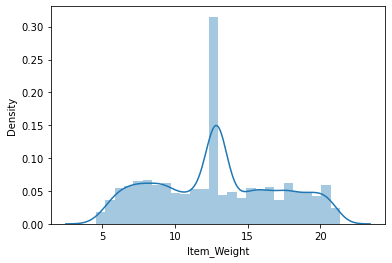

In [40]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

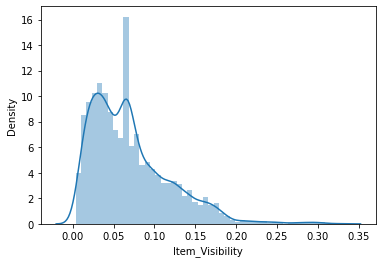

In [41]:
sns.distplot(df['Item_Visibility']) # skewed to the right

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


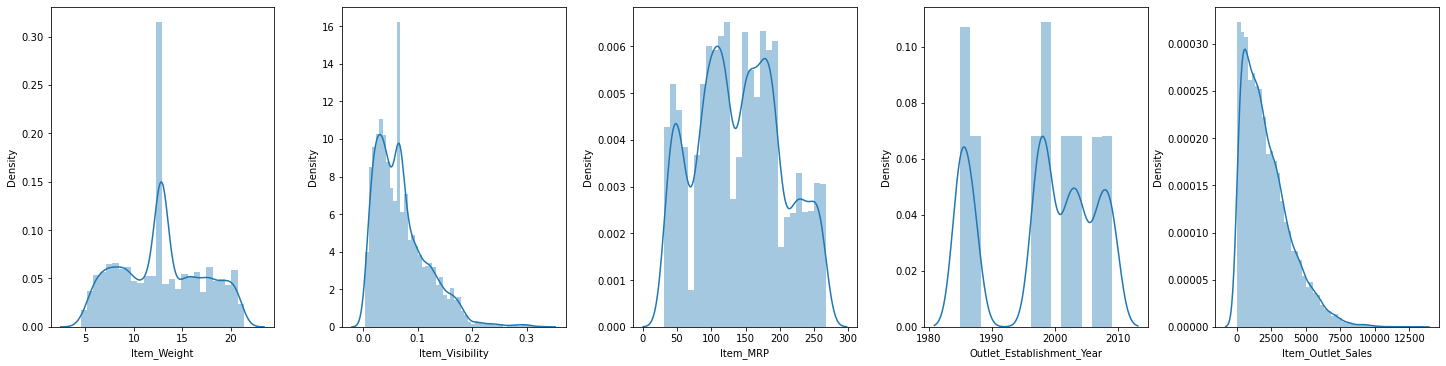

In [85]:
#Building distplots of numerical features in our df
index = 0

ncols = [x for x in df.columns if df.dtypes[x] != 'object']
length_ncols_numbers = len(ncols)
fig, ax = plt.subplots(nrows = 1, ncols = length_ncols_numbers, figsize = (20,5))

for x in df.columns:
    if(df.dtypes[x] != 'object'):
        sns.distplot(df[x], ax = ax[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [86]:
#converting skewed features into normally distributed features
df['Item_Outlet_Sales'] = np.log(df['Item_Outlet_Sales'] + 1)
df['Item_Visibility'] = np.log(df['Item_Visibility'])

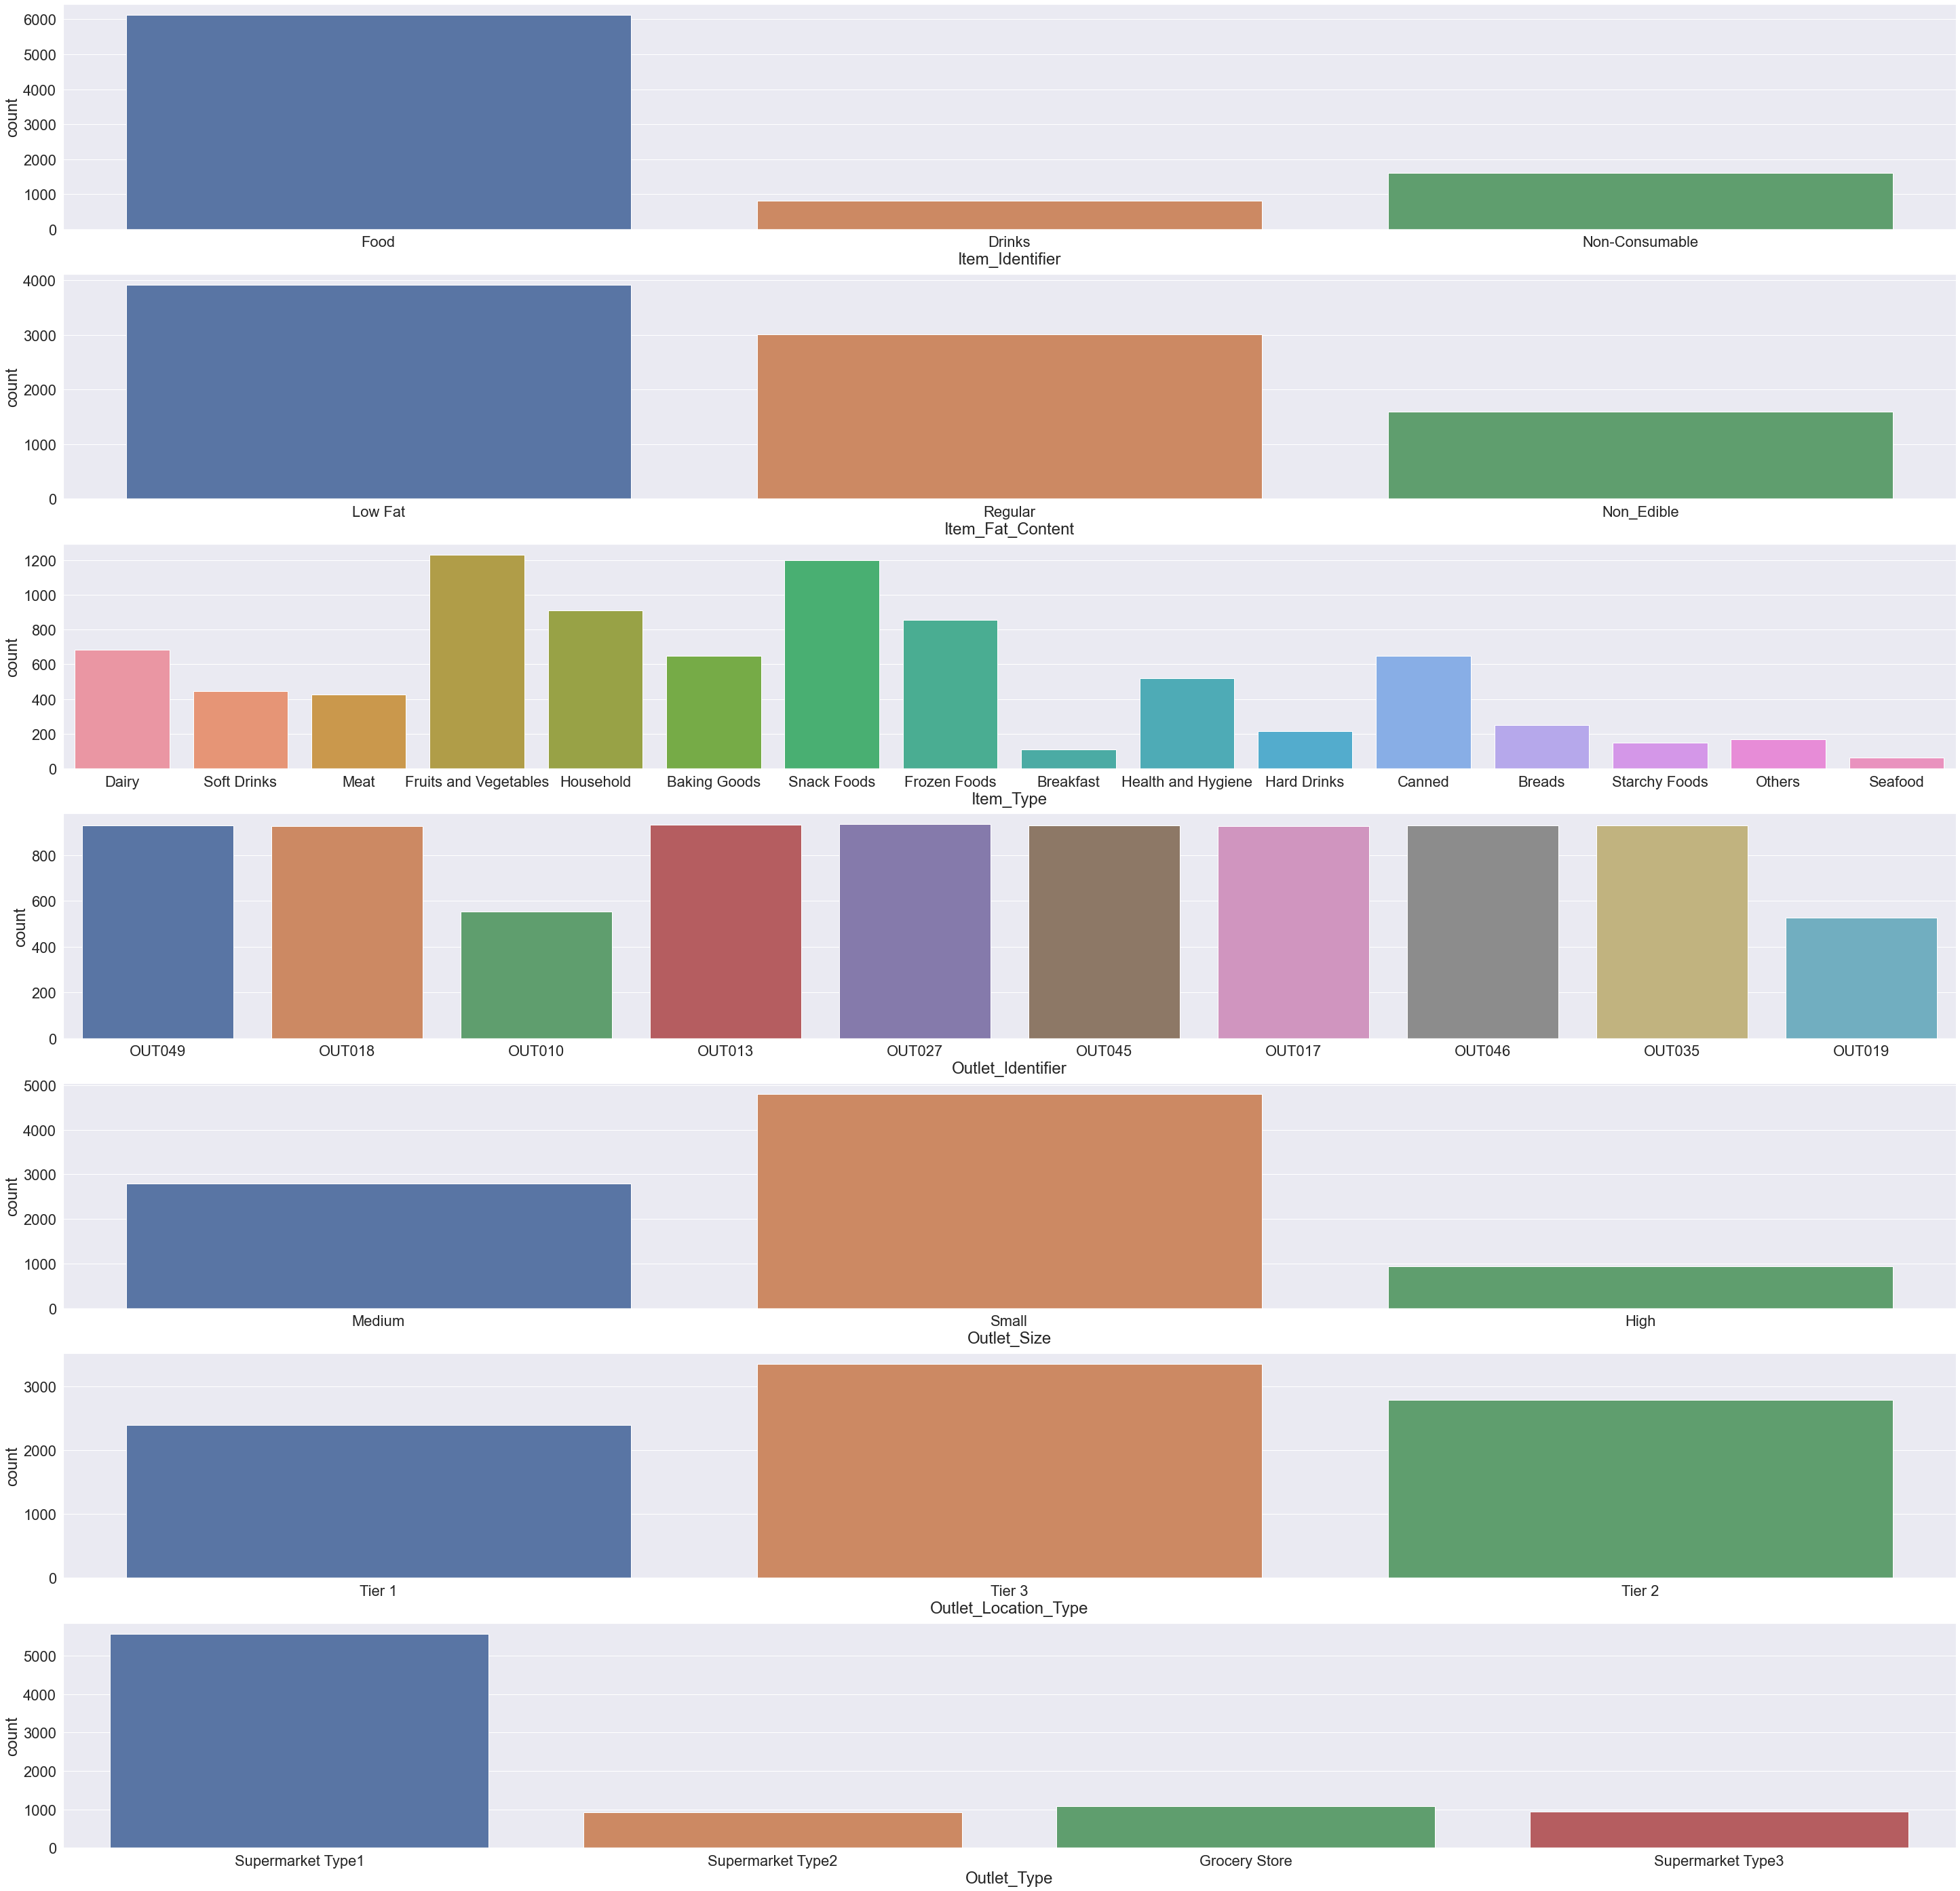

In [137]:
#building categorical features countplots
index = 0
nrows = [x for x in df.columns if df.dtypes[x] == 'object']

length_nrows_numbers = len(nrows)
fig, ax = plt.subplots(nrows = length_nrows_numbers, ncols = 1, figsize = (50,50))

for row in nrows:
    sns.countplot(df[row], ax = ax[index])
    index += 1

## Correlation Matrix

In [138]:
corr_table = df.corr()
corr_table

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.016981,0.024756,-0.008301,0.008059
Item_Visibility,-0.016981,1.000000,-0.001024,-0.051922,-0.151906
Item_MRP,0.024756,-0.001024,1.000000,0.005020,0.509886
Outlet_Establishment_Year,-0.008301,-0.051922,0.005020,1.000000,0.077032
Item_Outlet_Sales,0.008059,-0.151906,0.509886,0.077032,1.000000


<AxesSubplot:>

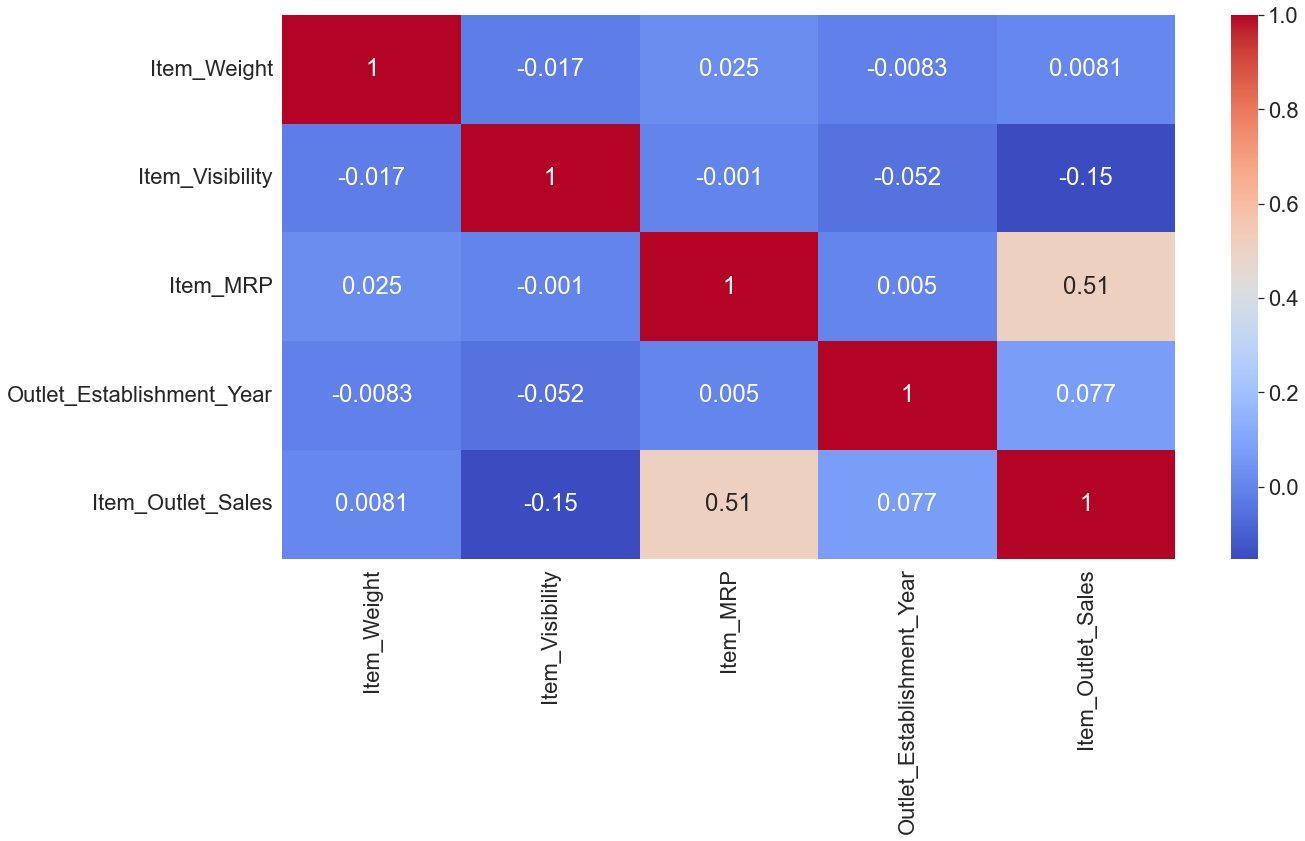

In [141]:
#building a heatmap
plt.figure(figsize = (20,10))
sns.heatmap(corr_table, annot = True, cmap = 'coolwarm')

In [143]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.30,Low Fat,-4.132215,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,Drinks,5.92,Regular,-3.948780,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,Food,17.50,Low Fat,-4.088756,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,Food,19.20,Regular,-2.716102,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664
4,Non-Consumable,8.93,Non_Edible,-2.716102,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451


## Label Encoding

In [152]:
#Label encoding categorical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

lb_encoder = LabelEncoder()

df['Outlet'] = lb_encoder.fit_transform(df['Outlet_Identifier'])

categories = nrows

for cat in categories:
    df[cat] = lb_encoder.fit_transform(df[cat])

In [153]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet
0,1,9.30,0,-4.132215,4,249.8092,OUT049,1999,1,0,1,8.225808,9
1,0,5.92,2,-3.948780,14,48.2692,OUT018,2009,1,2,2,6.096776,3
2,1,17.50,0,-4.088756,10,141.6180,OUT049,1999,1,0,1,7.648868,9
3,1,19.20,2,-2.716102,6,182.0950,OUT010,1998,2,2,0,6.597664,0
4,2,8.93,1,-2.716102,9,53.8614,OUT013,1987,0,2,1,6.903451,1


In [154]:
#Applying One Hot Encoder for categorical features
df = pd.get_dummies(df, columns = categories)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Identifier          8523 non-null   object 
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Item_Outlet_Sales          8523 non-null   float64
 6   Outlet                     8523 non-null   int64  
 7   Item_Identifier_0          8523 non-null   uint8  
 8   Item_Identifier_1          8523 non-null   uint8  
 9   Item_Identifier_2          8523 non-null   uint8  
 10  Item_Fat_Content_0         8523 non-null   uint8  
 11  Item_Fat_Content_1         8523 non-null   uint8  
 12  Item_Fat_Content_2         8523 non-null   uint8  
 13  Item_Type_0                8523 non-null   uint8

## Input Splitting

In [160]:
#Dropping unecessary columns
X = df.drop(columns = ['Outlet_Establishment_Year',  'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

## Train-Test Split and Model Training

In [161]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

def train(model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    
    #predict training data
    y_pred = model.predict(X_test)
    
    
    #perform cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    #mae_score = mean_absolute_error(y_train, y_pred)
    
    print("Model report: ")
    print("MSE: ",mean_squared_error(y_test, y_pred))
    print("CV Score: ",cv_score)
    #print("Mean absolute error: ",mae_score)
    print("Model score: ",model.score(X_test,y_test))
    

## Model Evaluation

In [162]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize = True)
train(model, X, y)

Model report: 
MSE:  0.28551536811948564
CV Score:  0.2898296658257467
Model score:  0.7284282378927094


In [164]:
coefs = pd.Series(model.coef_, X.columns ).sort_values()

In [165]:
coefs #feature and the w

Outlet_Type_0            -1.951295e+13
Outlet_Type_2            -1.951295e+13
Outlet_Type_1            -1.951295e+13
Outlet_Type_3            -1.951295e+13
Item_Identifier_1        -1.279047e+13
Item_Identifier_0        -1.279047e+13
Item_Fat_Content_1       -1.238789e+13
Outlet_Location_Type_2   -9.889870e+12
Outlet_Location_Type_0   -9.889870e+12
Outlet_Location_Type_1   -9.889870e+12
Outlet                   -6.828304e-03
Item_Weight              -1.820425e-03
Item_Visibility           2.472777e-04
Item_MRP                  8.224242e-03
Item_Fat_Content_0        1.044416e+12
Item_Fat_Content_2        1.044416e+12
Item_Type_11              1.289188e+13
Item_Type_9               1.289188e+13
Item_Type_8               1.289188e+13
Outlet_Size_0             1.344449e+13
Outlet_Size_2             1.344449e+13
Outlet_Size_1             1.344449e+13
Item_Identifier_2         1.447888e+13
Item_Type_12              2.672893e+13
Item_Type_14              2.672893e+13
Item_Type_4              

<AxesSubplot:>

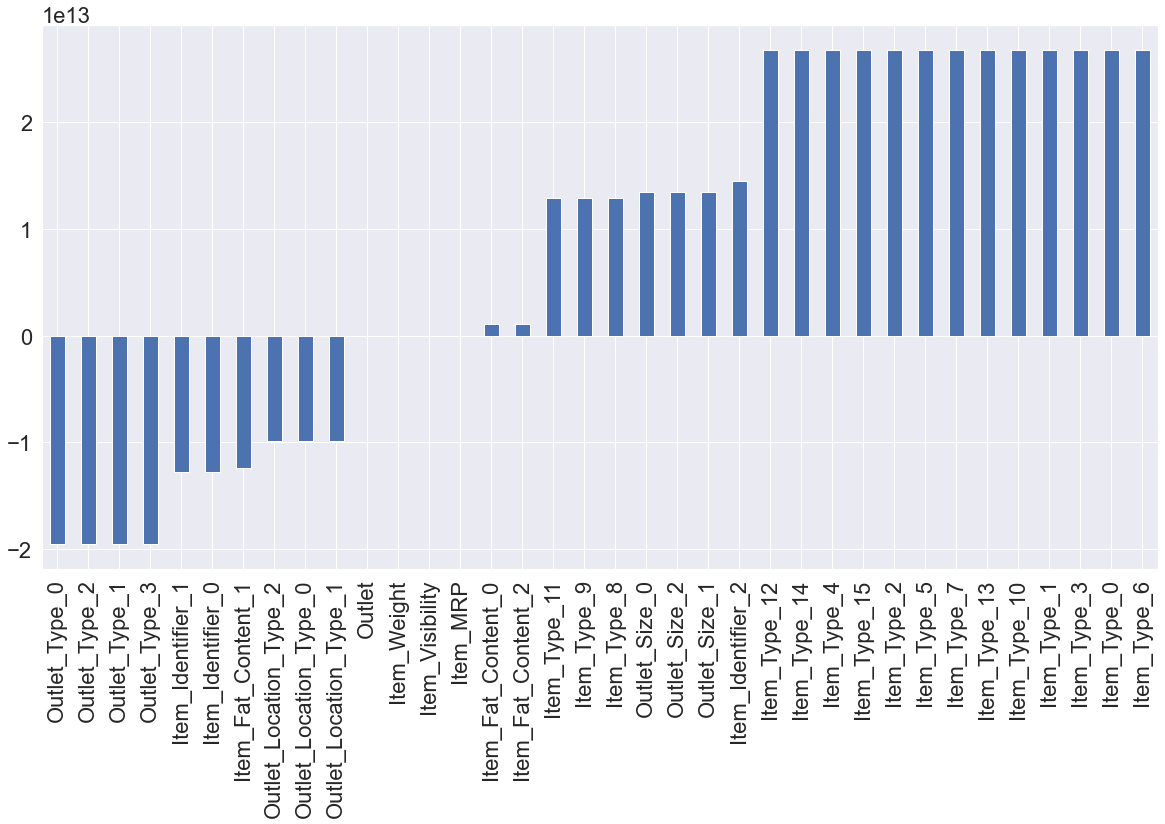

In [167]:
plt.subplots(figsize=(20,10))
coefs.plot(kind = "bar")